# **First order statistical mixing and coefficients**

How to use this notebook?

This notebook helped us to understand the Steerable Pyramid decomposition and framework developped by Portilla et al. 

1. Example in black and white 
2. Example in RGB

In [3]:
from utils.image_treatment import preprocess_image
import matplotlib.pyplot as plt
import numpy as np
import pyrtools as pt
from tqdm import tqdm 

In [2]:
import os
os.chdir('Convolutional-Wasserstein-Distances')
print(os.getcwd())

/Users/Corentin/Desktop/MVA 2024-2025/GDA/Project/Convolutional-Wasserstein-Distances


In [4]:
image_path1 = 'data/elephant.jpg'
image_path2 = 'data/gateau.png'

## **Examples for computing the coefficients of the steerable pyramid transform** 

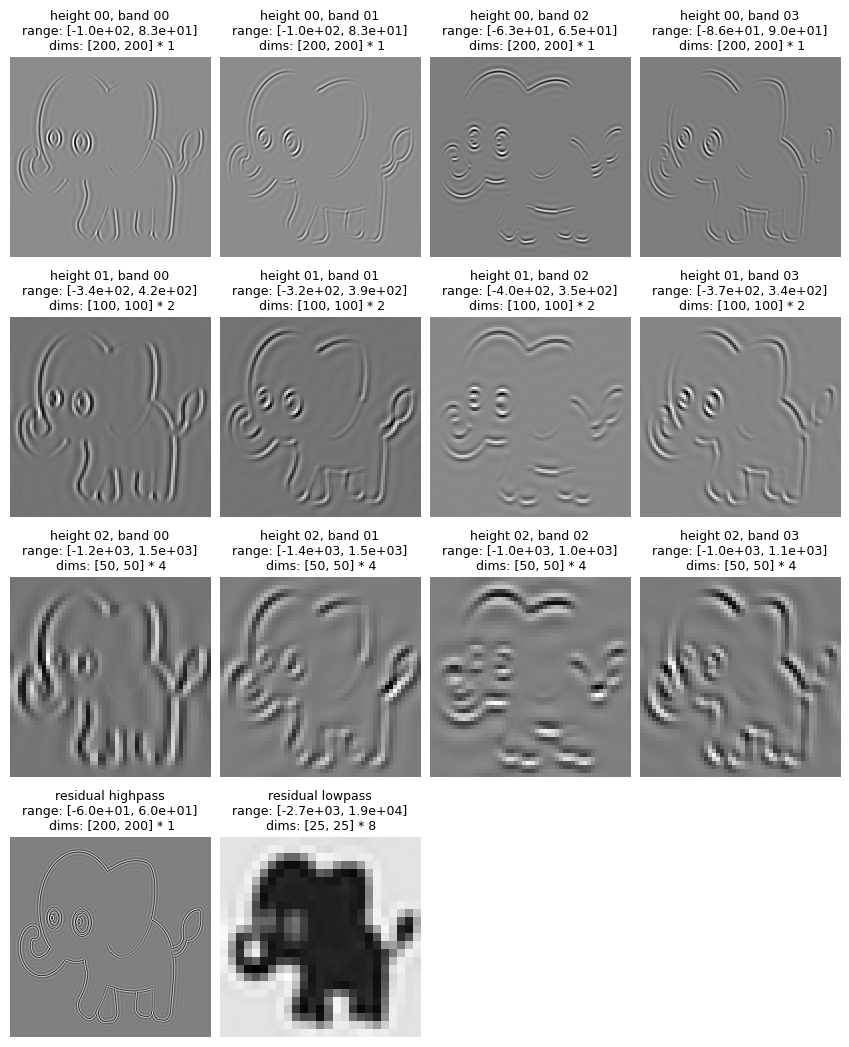

In [5]:
# Example of computing the coefficients with Steerable Pyramid Transform 
image1 = preprocess_image(image_path1, new_size = (200,200), end = "L")

# coeffs 
pyr = pt.pyramids.SteerablePyramidFreq(image1, height=3, order=3)
pt.pyrshow(pyr.pyr_coeffs);

## **Another example in RGB**

Statistics of coefficients for the Red channel:
residual_highpass: mean=7.196376827778294e-15, std=7.789173687745645
(0, 0): mean=-8.815170815523743e-18, std=5.1687356959638615
(0, 1): mean=-2.842170943040401e-18, std=8.821891147786662
(0, 2): mean=2.2737367544323207e-17, std=10.598543841316292
(0, 3): mean=-2.2737367544323207e-17, std=5.313231289008474
(1, 0): mean=5.755396159656811e-17, std=24.874290290083046
(1, 1): mean=-4.5474735088646414e-17, std=43.754946611711375
(1, 2): mean=-1.3642420526593922e-16, std=49.51623122508234
(1, 3): mean=-6.821210263296961e-17, std=25.33046159411276
(2, 0): mean=-1.8189894035458566e-16, std=117.05508014579128
(2, 1): mean=-1.0913936421275138e-15, std=185.19757451667647
(2, 2): mean=-1.0913936421275138e-15, std=201.97353776936438
(2, 3): mean=1.8189894035458566e-16, std=108.85621287692749
residual_lowpass: mean=7529.1952, std=1208.0036946422067

Statistics of coefficients for the Green channel:
residual_highpass: mean=8.105871529551223e-15, std=7.7

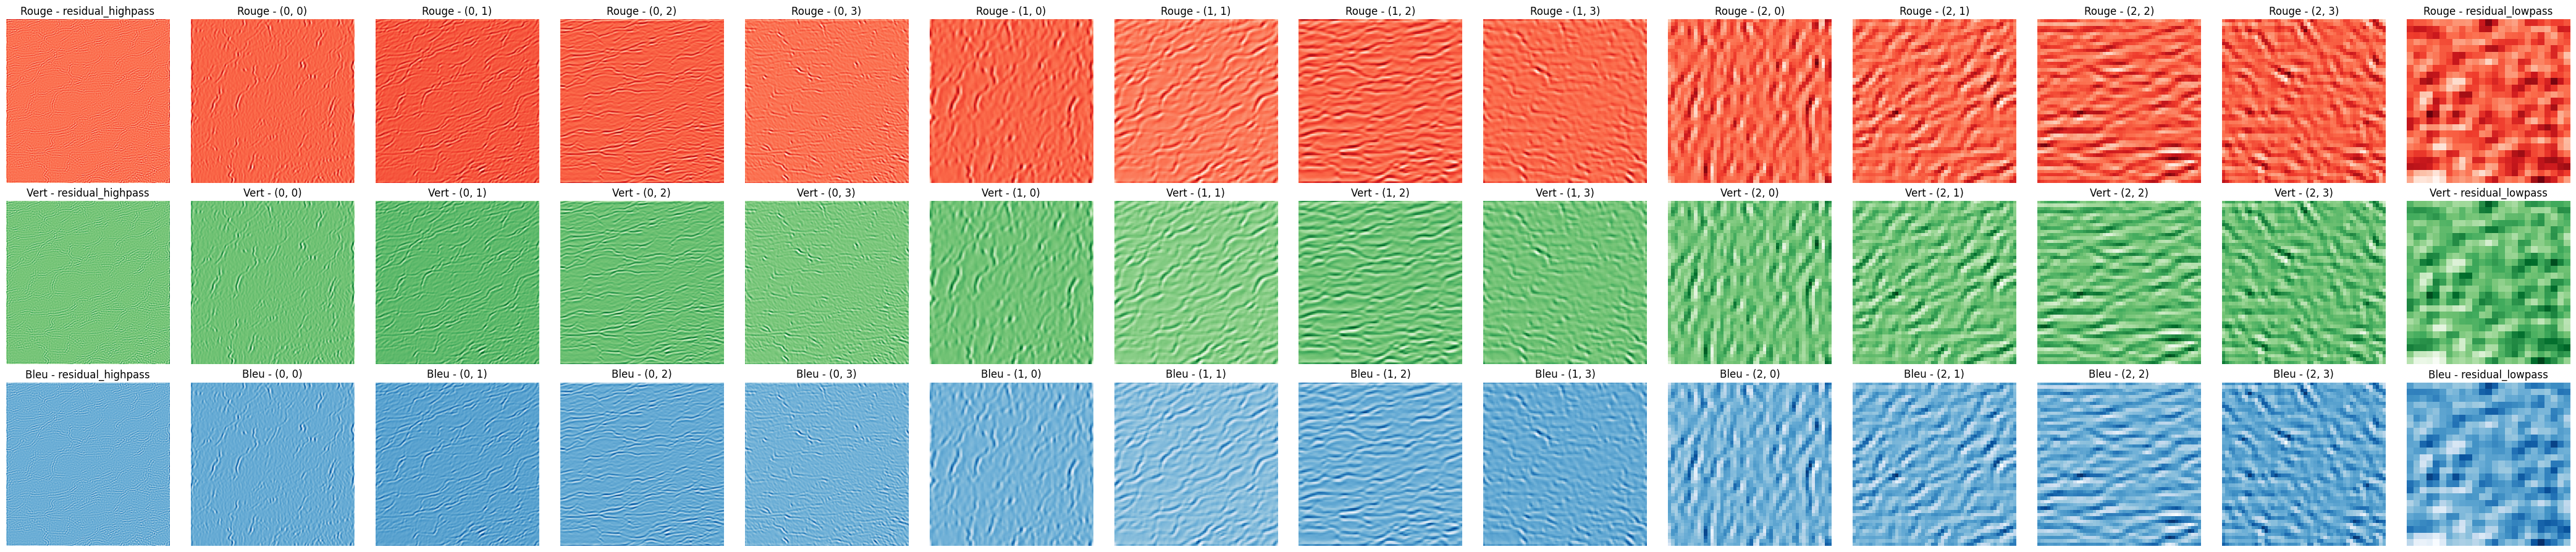

In [6]:
# calcul des coeffs sur les 3 canaux pour un exemple donné
texture_path1 = 'data/Water.jpg'
image = preprocess_image(texture_path1, new_size = (200,200))

# Separation in R, G, B
image_r, image_g, image_b = image[:,:,0], image[:,:,1], image[:,:,2]
image_r = np.array(image_r)
image_g = np.array(image_g)
image_b = np.array(image_b)

# Compute the coeffs
pyr_r = pt.pyramids.SteerablePyramidFreq(image_r, height=3, order=3)
pyr_g = pt.pyramids.SteerablePyramidFreq(image_g, height=3, order=3)
pyr_b = pt.pyramids.SteerablePyramidFreq(image_b, height=3, order=3)

# Stats
print("Statistics of coefficients for the Red channel:")
for band in pyr_r.pyr_coeffs:
    print(f"{band}: mean={pyr_r.pyr_coeffs[band].mean()}, std={pyr_r.pyr_coeffs[band].std()}")

print("\nStatistics of coefficients for the Green channel:")
for band in pyr_g.pyr_coeffs:
    print(f"{band}: mean={pyr_g.pyr_coeffs[band].mean()}, std={pyr_g.pyr_coeffs[band].std()}")

print("\nStatistics of coefficients for the Blue channel:")
for band in pyr_b.pyr_coeffs:
    print(f"{band}: mean={pyr_b.pyr_coeffs[band].mean()}, std={pyr_b.pyr_coeffs[band].std()}")

band_keys = list(pyr_r.pyr_coeffs.keys())

fig, axes = plt.subplots(3, len(band_keys), figsize=(3 * len(band_keys), 9))  # 3 lignes pour R, G, B ; colonnes = nombre de bandes
for i, band in enumerate(band_keys):
    axes[0, i].imshow(pyr_r.pyr_coeffs[band], cmap='Reds')
    axes[0, i].set_title(f"Rouge - {band}")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(pyr_g.pyr_coeffs[band], cmap='Greens')
    axes[1, i].set_title(f"Vert - {band}")
    axes[1, i].axis('off')
    
    axes[2, i].imshow(pyr_b.pyr_coeffs[band], cmap='Blues')
    axes[2, i].set_title(f"Bleu - {band}")
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

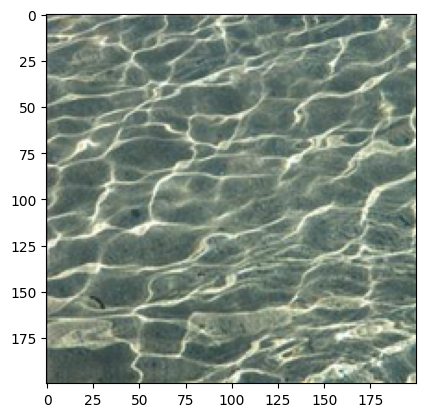

In [7]:
plt.imshow(image)